<a href="https://colab.research.google.com/github/jrebull/MIAAD_Mate/blob/main/eigen_taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller: Vectores y Valores Propios en Redes Sociales
# Objetivo: mostrar cómo se usan en ciencia de datos para medir importancia en redes.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Paso 1: Definir la red
Creamos una matriz de adyacencia que representa conexiones en una red social

In [9]:
A = np.array([
    [0, 1, 1, 0, 0],  # Usuario 1 sigue a 2 y 3
    [1, 0, 1, 1, 0],  # Usuario 2 sigue a 1, 3, 4
    [1, 1, 0, 1, 1],  # Usuario 3 sigue a todos menos a sí mismo
    [0, 0, 1, 0, 1],  # Usuario 4 sigue a 3 y 5
    [0, 0, 1, 1, 0]   # Usuario 5 sigue a 3 y 4
])

print("Matriz de adyacencia:\n", A)

Matriz de adyacencia:
 [[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 1 1]
 [0 0 1 0 1]
 [0 0 1 1 0]]


In [10]:
# Número de nodos
n = 30

# Crear matriz de adyacencia aleatoria (probabilidad de conexión = 0.2)
A = np.random.choice([0, 1], size=(n, n), p=[0.8, 0.2])

# Quitar autoconexiones (diagonal en 0)
np.fill_diagonal(A, 0)

## Paso 2: Visualizar la red

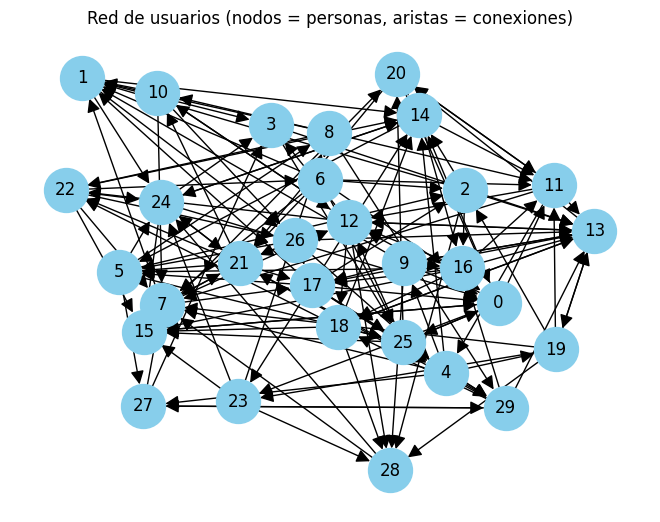

In [11]:
G = nx.from_numpy_array(A, create_using=nx.DiGraph)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, arrowsize=20)
plt.title("Red de usuarios (nodos = personas, aristas = conexiones)")
plt.show()

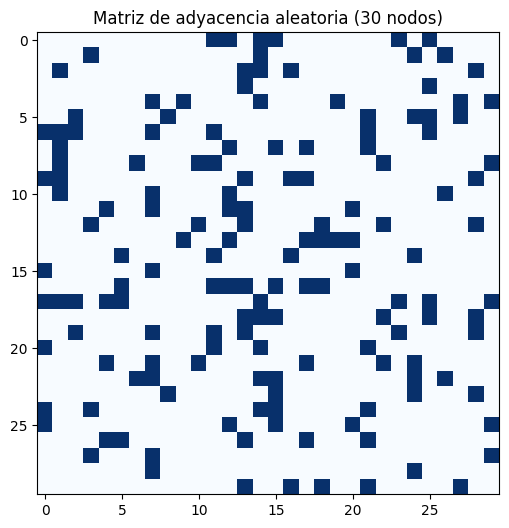

In [16]:
# Visualizar la red como heatmap
plt.figure(figsize=(6,6))
plt.imshow(A, cmap="Blues", interpolation="nearest")
plt.title("Matriz de adyacencia aleatoria ("+str(n)+" nodos)")
plt.show()

## Paso 3: Calcular valores y vectores propios

In [12]:
eigvals, eigvecs = np.linalg.eig(A)

print("\nValores propios:\n", eigvals)
#print("\nVectores propios:\n",eigvecs)


Valores propios:
 [ 5.08049248e+00+0.j         -5.27417313e-01+2.10013132j
 -5.27417313e-01-2.10013132j -1.57008869e+00+1.27898684j
 -1.57008869e+00-1.27898684j -1.91802069e+00+0.54838615j
 -1.91802069e+00-0.54838615j  1.58514087e+00+0.66056659j
  1.58514087e+00-0.66056659j  9.77420385e-01+1.32951938j
  9.77420385e-01-1.32951938j  2.46155294e-02+1.52631834j
  2.46155294e-02-1.52631834j  7.18692264e-01+1.24193196j
  7.18692264e-01-1.24193196j -1.27654051e+00+0.6003729j
 -1.27654051e+00-0.6003729j   1.10810031e+00+0.j
 -7.89417943e-01+0.76591021j -7.89417943e-01-0.76591021j
  7.31789701e-01+0.j          4.43457859e-01+0.46281291j
  4.43457859e-01-0.46281291j  2.72014790e-02+0.79432582j
  2.72014790e-02-0.79432582j -7.34466885e-01+0.15110538j
 -7.34466885e-01-0.15110538j -7.27430383e-16+0.j
 -4.20767605e-01+0.35095834j -4.20767605e-01-0.35095834j]


Vector propio principal (asociado al mayor valor propio)

In [13]:
# Identificar el índice del mayor valor propio en magnitud
idx = np.argmax(np.abs(eigvals))

# Seleccionar el vector propio correspondiente
principal_eigvec = np.abs(eigvecs[:, idx])

In [14]:
centrality = principal_eigvec / principal_eigvec.sum()

print("\nVector propio principal (normalizado):")
for i, score in enumerate(centrality, start=1):
    print(f"Importancia del Usuario {i}: {score:.3f}")


Vector propio principal (normalizado):
Importancia del Usuario 1: 0.033
Importancia del Usuario 2: 0.023
Importancia del Usuario 3: 0.032
Importancia del Usuario 4: 0.015
Importancia del Usuario 5: 0.039
Importancia del Usuario 6: 0.037
Importancia del Usuario 7: 0.045
Importancia del Usuario 8: 0.034
Importancia del Usuario 9: 0.041
Importancia del Usuario 10: 0.043
Importancia del Usuario 11: 0.026
Importancia del Usuario 12: 0.035
Importancia del Usuario 13: 0.034
Importancia del Usuario 14: 0.045
Importancia del Usuario 15: 0.030
Importancia del Usuario 16: 0.019
Importancia del Usuario 17: 0.051
Importancia del Usuario 18: 0.055
Importancia del Usuario 19: 0.034
Importancia del Usuario 20: 0.035
Importancia del Usuario 21: 0.028
Importancia del Usuario 22: 0.043
Importancia del Usuario 23: 0.039
Importancia del Usuario 24: 0.019
Importancia del Usuario 25: 0.027
Importancia del Usuario 26: 0.030
Importancia del Usuario 27: 0.043
Importancia del Usuario 28: 0.017
Importancia del U

## Paso 5: Visualización de importancia

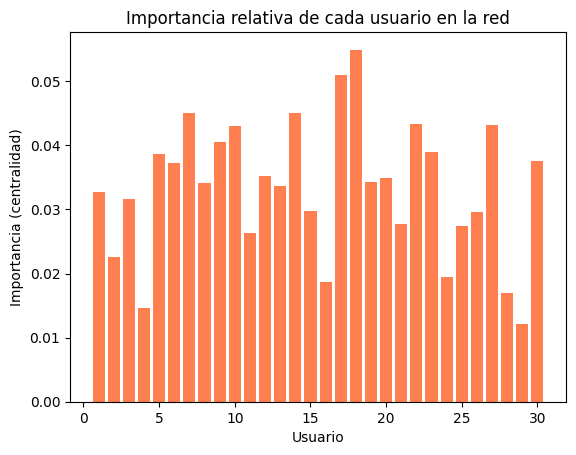

In [15]:
plt.bar(range(1, len(centrality) + 1), centrality, color='coral')
plt.xlabel("Usuario")
plt.ylabel("Importancia (centralidad)")
plt.title("Importancia relativa de cada usuario en la red")
plt.show()
